# **Fashion MNIST ANN Model**

## **1. Import Libraries**

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## **2. Load Dataset and splitting**

In [14]:
# Splitting dataset in train and test from keras
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Splitting train part into a new training set and a validation set
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

## **3. Data Exploration and Preprocessing**

In [15]:
print('X Train Shape: ',x_train.shape)
print('Y Train Shape: ',y_train.shape)
print('X Test Shape: ',x_test.shape)
print('Y Test Shape: ',y_test.shape)
print('X Validation Shape: ',x_val.shape)
print('Y Validation Shape: ',y_val.shape)

X Train Shape:  (48000, 28, 28)
Y Train Shape:  (48000,)
X Test Shape:  (10000, 28, 28)
Y Test Shape:  (10000,)
X Validation Shape:  (12000, 28, 28)
Y Validation Shape:  (12000,)


The data shows 70,000 records/images divided by training (48,000), validation (12,000) and testing (10,000) sets. We are working with images represented by NumPy arrays. These images have 28*28 pixels dimensions.

In [16]:
# Finding out the unique classes in the dataset
unique_classes = np.unique(y_train)
print("Unique class labels:", unique_classes)

Unique class labels: [0 1 2 3 4 5 6 7 8 9]


The Fashion MNIST dataset comes with predefined labels. This dataset provides the images (x_train, x_test) and corresponding labels (y_train, y_test). These labels are numerical values (0 to 9) that represent the different clothing categories.  

To make the labels more human-readable, I simply mapped those numerical values to their corresponding class names.

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### **Visualizing the data**

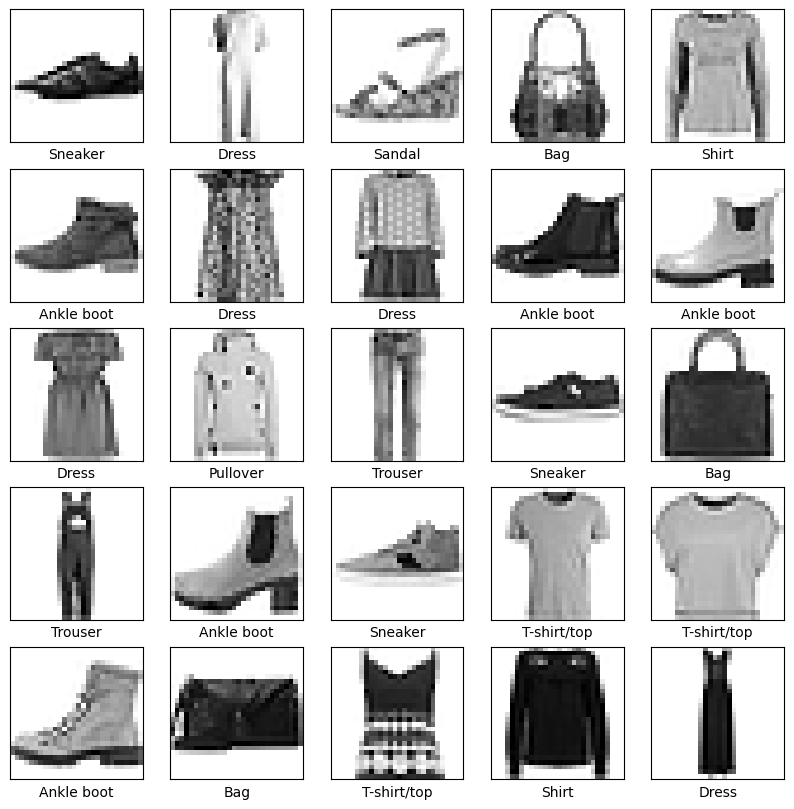

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Class distribution: It's important to understand if your dataset has a balanced representation of each class or if some classes have significantly more samples than others. An imbalanced dataset can lead to a biased model that performs poorly on under-represented classes.

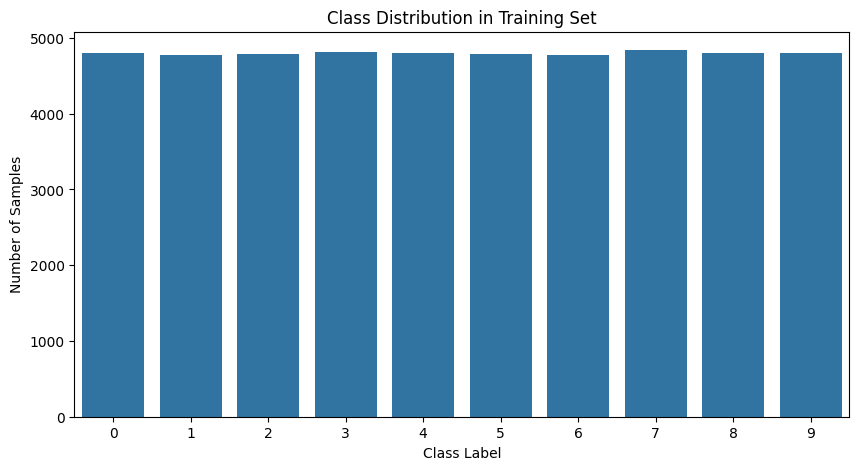

In [19]:
import seaborn as sns
import pandas as pd

# Count the occurrences of each class label
class_counts = pd.Series(y_train).value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.show()

It seems like the dataset is well balanced.

### **Normalization**

Neural networks typically train better when the input data is normalized. We'll scale the pixel values from the range 0-255 to 0-1.

In [20]:
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## **ANN Model**

### **Building the model**

We'll use the keras.Sequential model, which allows to build a neural network layer by layer.

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Input layer: Flattens the 28x28 images
    keras.layers.Dense(128, activation='relu'),  # Hidden layer: 128 neurons, ReLU activation
    keras.layers.Dense(10, activation='softmax')  # Output layer: 10 neurons (one for each class), softmax activation
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


*   **Input Layer**: The Flatten layer converts each 28x28 image into a 1D array of 784 pixels. This is necessary to feed the image data into the subsequent dense layers.

*   **Hidden Layer**: The Dense layer with 128 neurons performs the core computation. The ReLU activation function introduces non-linearity, allowing the network to learn complex patterns in the data.

*   **Output Layer**: The final Dense layer has 10 neurons, corresponding to the 10 clothing categories. The softmax activation function ensures the output is a probability distribution over the classes.

### **Compile the Model**

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

*  **Optimizer**: adam is a popular optimization algorithm that adapts the learning rate for each parameter, leading to efficient training.

*  **Loss function**: sparse_categorical_crossentropy is suitable for multi-class classification problems with integer labels.

*  **Metrics**: accuracy is a common metric to measure the overall performance of the model.

### **Train the model**

In [23]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7757 - loss: 0.6522 - val_accuracy: 0.8457 - val_loss: 0.4256
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8578 - loss: 0.3988 - val_accuracy: 0.8666 - val_loss: 0.3768
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8727 - loss: 0.3502 - val_accuracy: 0.8726 - val_loss: 0.3518
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8840 - loss: 0.3195 - val_accuracy: 0.8668 - val_loss: 0.3785
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8882 - loss: 0.3011 - val_accuracy: 0.8852 - val_loss: 0.3215
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8978 - loss: 0.2769 - val_accuracy: 0.8768 - val_loss: 0.3357
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9022 - loss: 0.2656 - val_accuracy: 0.8792 - val_loss: 0.3335
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9009 - loss: 0.2624 

*  **x_train, y_train**: Your training data and labels.

*  **epochs=10**: The number of times the model will iterate over the entire training dataset.

*  **validation_data**: We include the validation set to monitor the model's performance on unseen data during training. This helps detect overfitting.

### **Evaluate the model**

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8771 - loss: 0.3529
Test accuracy: 0.8787999749183655


After evaluating the model, we can see that accuracy is good enough, the ANN model does a good job classifying. However, we can improve these results performing the following steps:
*  **Increasing the number of epochs**: Train the model for more iterations to see if it continues to improve.

*  **Adding more layers or neurons**: Experiment with different network architectures to increase the model's capacity.

*  **Trying different activation functions or optimizers**: Explore other options to see if they lead to better performance.

*  **Regularization techniques**: Apply techniques like dropout or L2 regularization to prevent overfitting.

## **Visualizing samples from test dataset**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


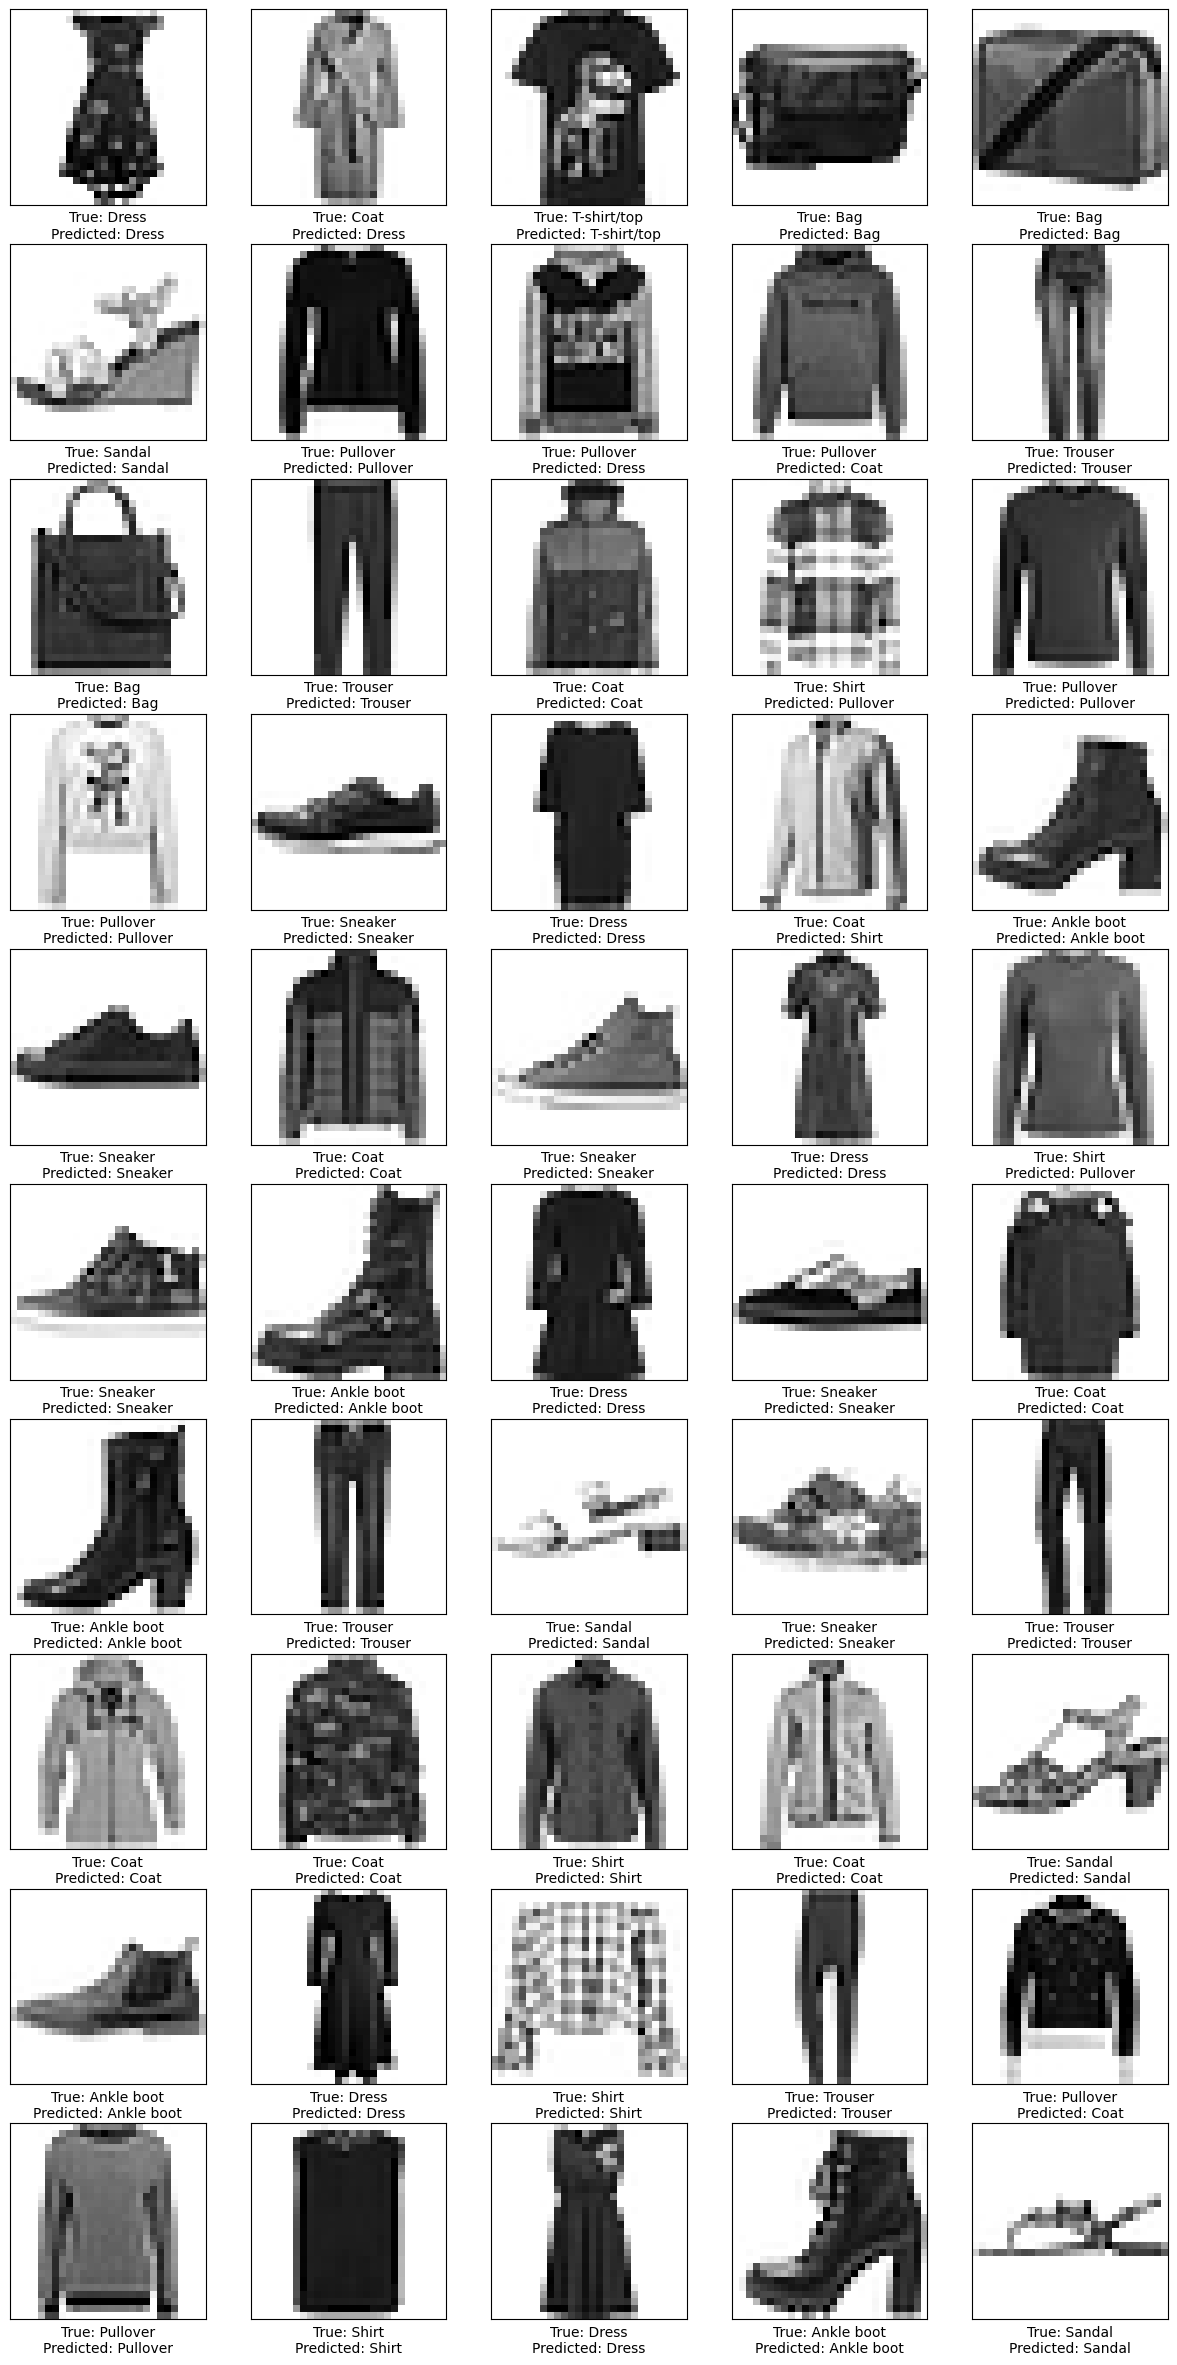

In [33]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Select a few random images from the test set
num_samples = 50
sample_indices = np.random.choice(x_test.shape[0], num_samples, replace=False)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

# Get the predicted classes for the sample images
predicted_classes = np.argmax(predictions[sample_indices], axis=1)

# Display the images with their true and predicted labels
plt.figure(figsize=(15, 30))
for i in range(num_samples):
    plt.subplot(10, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_images[i], cmap=plt.cm.binary)
    true_label = class_names[sample_labels[i]]
    predicted_label = class_names[predicted_classes[i]]
    plt.xlabel(f"True: {true_label}\nPredicted: {predicted_label}")
plt.show()

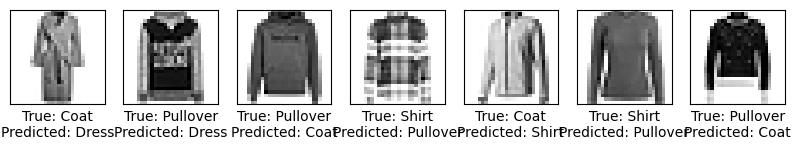

In [34]:
# Get the indices of misclassified images
misclassified_indices = np.where(predicted_classes != sample_labels)[0]

# Display the misclassified images with their true and predicted labels
plt.figure(figsize=(10, 5))
for i, idx in enumerate(misclassified_indices):
    plt.subplot(1, len(misclassified_indices), i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_images[idx], cmap=plt.cm.binary)
    true_label = class_names[sample_labels[idx]]
    predicted_label = class_names[predicted_classes[idx]]
    plt.xlabel(f"True: {true_label}\nPredicted: {predicted_label}")
plt.show()